In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense,Dropout
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
import matplotlib.pyplot as plt
import math
import csv
import numpy as np

In [2]:
z=[]
for a in range(0,181,1):
  for b in range(0,181,1):
    c = 90 - a - b
    x=50*math.cos(math.radians(a))+40*math.cos(math.radians(a+b))+20*math.cos(math.radians(a+b+c))
    y=50*math.sin(math.radians(a))+40*math.sin(math.radians(a+b))+20*math.sin(math.radians(a+b+c))
    #chuan hoa du lieu ve 0 va 1
    a = a/180
    b = b/180
    c = (c+180.0)/270.0
    x = (x+110)/220
    y = (y+110)/220
    z.append(np.array((a,b,c,x,y)))    

In [3]:
header = ['goc1', 'goc2','goc3', 'x', 'y']
with open('data3.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(z)

In [4]:
data = pd.read_csv('data3.csv')
numpy_dataset = data.values
y=numpy_dataset[:,:3]
x=numpy_dataset[:,3:]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
x_train.shape

(26208, 2)

Epoch 1/10
656/656 [==============================] - 2s 3ms/step - loss: 0.0690 - acc: 0.8692 - val_loss: 0.0099 - val_acc: 0.9908
Epoch 2/10
656/656 [==============================] - 2s 3ms/step - loss: 0.0092 - acc: 0.9904 - val_loss: 0.0037 - val_acc: 1.0000
Epoch 3/10
656/656 [==============================] - 2s 3ms/step - loss: 0.0062 - acc: 0.9931 - val_loss: 0.0058 - val_acc: 0.9996
Epoch 4/10
656/656 [==============================] - 2s 3ms/step - loss: 0.0059 - acc: 0.9942 - val_loss: 0.0046 - val_acc: 0.9893
Epoch 5/10
656/656 [==============================] - 2s 3ms/step - loss: 0.0051 - acc: 0.9937 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 6/10
656/656 [==============================] - 2s 3ms/step - loss: 0.0054 - acc: 0.9948 - val_loss: 0.0058 - val_acc: 0.9893
Epoch 7/10
656/656 [==============================] - 2s 3ms/step - loss: 0.0056 - acc: 0.9930 - val_loss: 0.0075 - val_acc: 0.9880
Epoch 8/10
656/656 [==============================] - 2s 3ms/step - loss: 0.

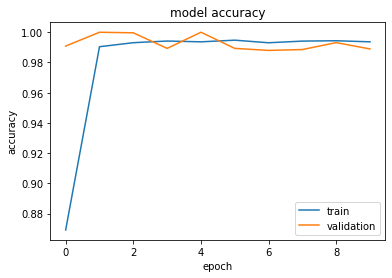

In [8]:
model = Sequential() 
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3))
model.compile(loss='mae', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.2)
score = model.evaluate(x_test,y_test,verbose = 0)
print('Sai so kiem tra la:',score[0])
print('Do chinh xac kiem tra', score[1])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'])
plt.show()

In [7]:
Px = (40+110)/220
Py = (50+110)/220
test = model.predict([[Px,Py]])
t1 = test[0][0]*180
t2 = test[0][1]*180
t3 =  test[0][2]*270.0-180.0
x_1=50*math.cos(math.radians(t1))+40*math.cos(math.radians(t1+t2))+20*math.cos(math.radians(t1+t2+t3))
y_1=50*math.sin(math.radians(t1))+40*math.sin(math.radians(t1+t2))+20*math.sin(math.radians(t1+t2+t3)) 
print('x = ',x_1,'y = ',y_1)
print(t1,t2,t3)

x =  41.17879187647376 y =  58.908020581956514
0.2769184671342373 104.33284521102905 -18.246896266937256
